<a href="https://colab.research.google.com/github/ratneshpuri/Artificial-Intelligence/blob/main/Emotional_AI/Emotional_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and datasets

In [55]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
keyfacial_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emotional_AI/data.csv")

In [5]:
keyfacial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [6]:
keyfacial_df.shape

(2140, 31)

In [7]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [8]:
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [9]:
keyfacial_df['Image'].shape

(2140,)

In [10]:
keyfacial_df['Image']=keyfacial_df['Image'].apply(lambda x: np.fromstring(x,dtype=int, sep=' ').reshape(96,96))

In [12]:
keyfacial_df['Image'][0].shape

(96, 96)

In [13]:
# Describing the data

keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


## Performing Image Visualization

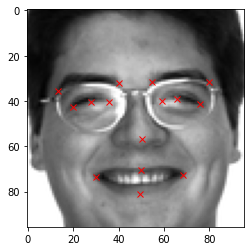

In [17]:
i=np.random.randint(1,len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df.loc[i][j-1],keyfacial_df.loc[i][j],'rx')

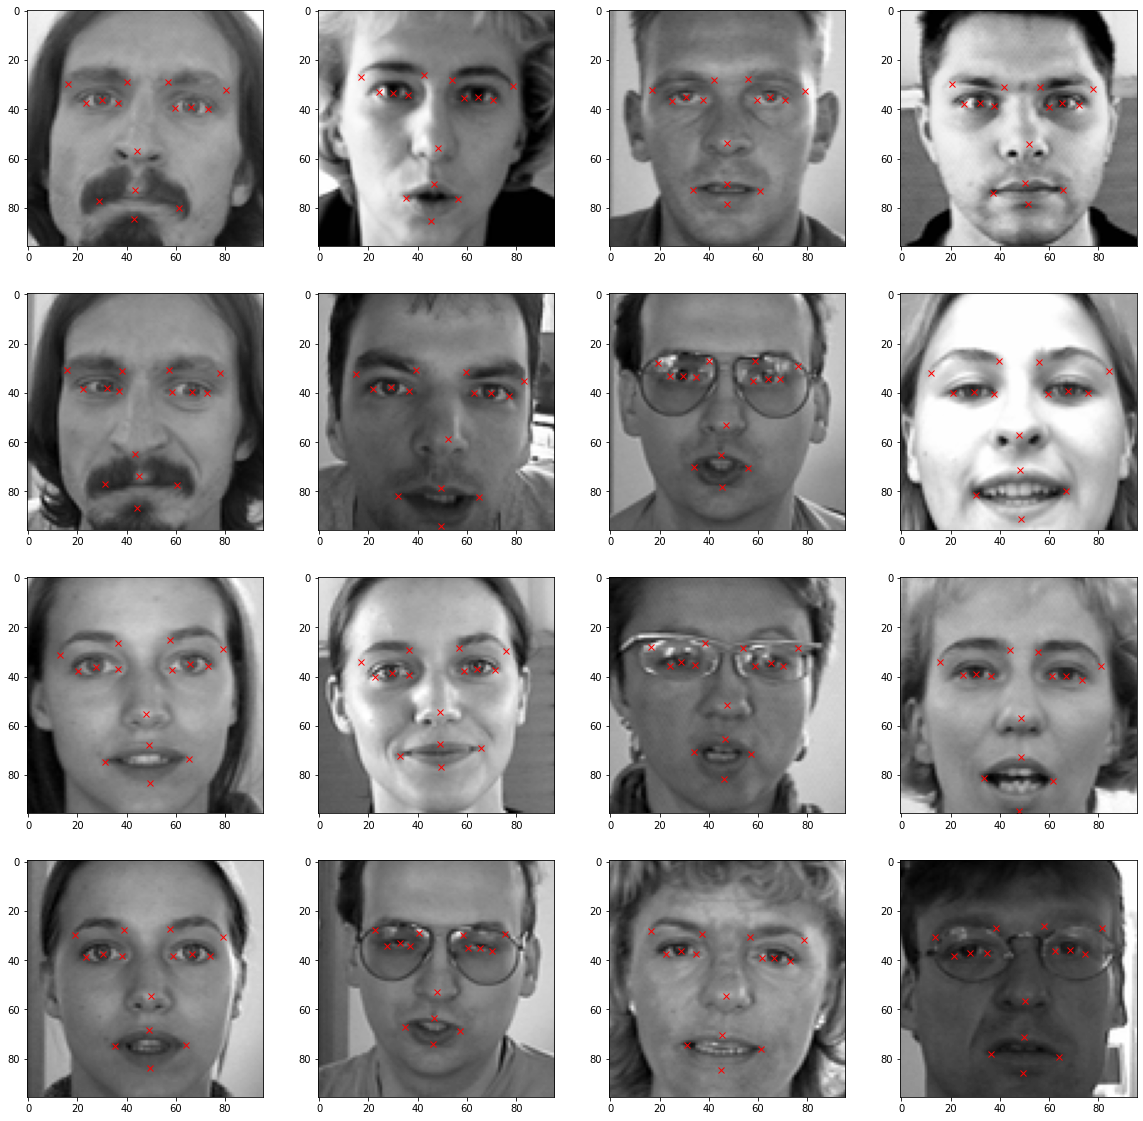

In [19]:
#Plotting more images

fig=plt.figure(figsize=(20,20))

for i in range(16):
  ax=fig.add_subplot(4,4,i+1)
  image=plt.imshow(keyfacial_df['Image'][i],cmap='gray')
  for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[i][j-1],keyfacial_df.loc[i][j],'rx')

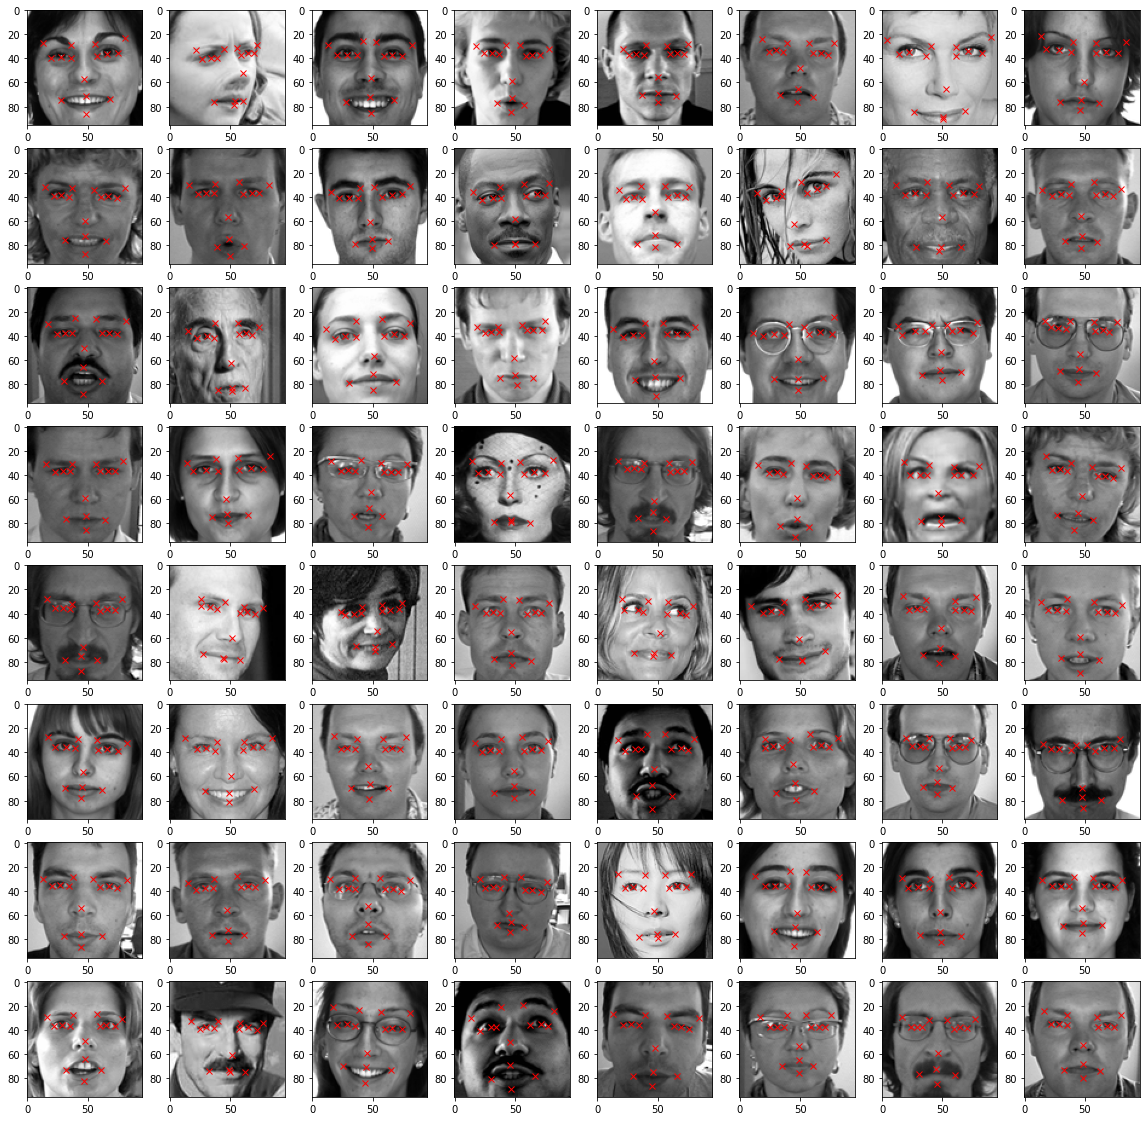

In [21]:
# Randomly visualizing 64 images

fig=plt.figure(figsize=(20,20))
for i in range(64):
  k=np.random.randint(1,len(keyfacial_df))
  ax=fig.add_subplot(8,8,i+1)
  image=plt.imshow(keyfacial_df['Image'][k],cmap='gray')
  for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[k][j-1],keyfacial_df.loc[k][j],'rx')

## Performing Image Augementation

In [22]:
# Creating a copy of the dataframe

import copy
keyfacial_df_copy=copy.copy(keyfacial_df)

In [26]:
columns=keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [27]:
# Horizontal Flip - flip the images along y axis

keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x: np.flip(x,axis=1))

#Since we are flipping horizontally our x co-ordinate points would change

for i in range(len(columns)):
  if i%2==0:
    keyfacial_df_copy[columns[i]]=keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

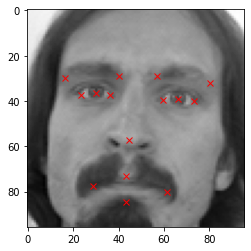

In [29]:
#Showing the orignal image

plt.imshow(keyfacial_df['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j],'rx')

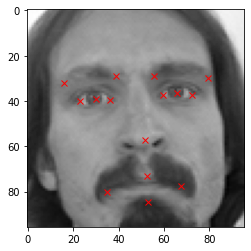

In [30]:
# Showing the flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j],'rx')


In [32]:
# Concatenate the original dataframe with the sugmented dataframe

augmented_df=np.concatenate((keyfacial_df,keyfacial_df_copy))
augmented_df.shape

(4280, 31)

In [33]:
# Randomly increasing the brightness of the image

keyfacial_df_copy=copy.copy(keyfacial_df)
keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x: np.clip(np.random.uniform(1.5,2)*x,0.0,255.0))
augmented_df=np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(6420, 31)

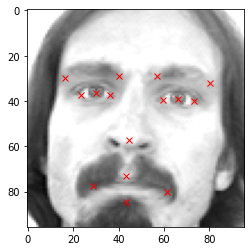

In [35]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

In [40]:
# Randomly decreasing the brightness of the image
keyfacial_df_copy=copy.copy(keyfacial_df)
keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x: np.clip(np.random.uniform(0.3,0.5)*x,0.0,255.0))
augmented_df=np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(8560, 31)

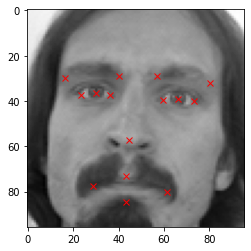

In [41]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

In [42]:
# Flipping the images verticaly

keyfacial_df_copy=copy.copy(keyfacial_df)


In [43]:
keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x: np.flip(x,axis=0))

In [44]:
for i in range(len(columns)):
  if i%2==1:
    keyfacial_df_copy[columns[i]]=keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

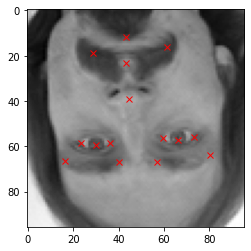

In [46]:
#Visualizing the vertically flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

In [48]:
augmented_df=np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(12840, 31)

## Performing data normalization nad training data preperation

In [51]:
img= augmented_df[:,30]

#Normalizing the images
img=img/255.0

#Creating an empty array
X=np.empty((len(img),96,96,1))

for i in range(len(img)):
  X[i,]=np.expand_dims(img[i],axis=2)

#Converting array to float32
X=np.asarray(X).astype(np.float32)
X.shape

(12840, 96, 96, 1)

In [54]:
#obtaining the values of x and y whih are used as targets

y=augmented_df[:,:30]
y=np.asarray(y).astype(np.float32)
y.shape

(12840, 30)

In [56]:
#Split the data into train and test data
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [61]:
X_train.shape

(10272, 96, 96, 1)

In [62]:
X_test.shape

(2568, 96, 96, 1)